In [1]:
import numpy as np
import pylab as pl
import pandas as pd
%matplotlib inline

In this assignment we are going to look a bit more at the kiwi measurements dataset.

In [2]:
df = pd.read_excel('PonuiMeasurements.xlsx')
df.head()

,Name,sex,Date,Bill length,Bill length.1,Bill length.2,ts L_1,ts L_2,ts L_3,ts W_1,ts W_2,ts W_3,ts D_1,ts D_2,ts D_3,Body Condition (0-4),Weight
0,Ivan,m,2012-03-18,91.6,NaN,NaN,89.5,NaN,NaN,10.9,NaN,NaN,13.2,NaN,NaN,NaN,1920.0
1,Genesis,m,2012-03-18,92.5,NaN,NaN,88.2,NaN,NaN,13.0,NaN,NaN,15.6,NaN,NaN,NaN,2180.0
2,Dario,m,2012-03-18,89.5,NaN,NaN,87.5,NaN,NaN,12.7,NaN,NaN,14.3,NaN,NaN,NaN,2280.0
3,Ponui,m,2012-03-18,90.6,NaN,NaN,89.6,NaN,NaN,11.3,NaN,NaN,14.8,NaN,NaN,NaN,1995.0
4,Ponui,m,2012-03-18,90.6,NaN,NaN,89.6,NaN,NaN,11.3,NaN,NaN,14.8,NaN,NaN,NaN,1995.0



# Task 1

* Compute the average bill length, tarsus length, width, depth from the 3 measurements of each (1 mark)
* Make a new dataframe that contains only Name, sex, Date, Weight (1 mark)
* Add the new means into new columns called Bill, TLen, TWid, TDep (1 mark)
* Drop any row with NaN in (1 mark)

In [3]:
df['Bill'] = df[['Bill length', 'Bill length.1', 'Bill length.2']].mean(axis=1)
df['TLen'] = df[['ts L_1', 'ts L_2', 'ts L_3']].mean(axis=1)
df['TWid'] = df[['ts W_1', 'ts W_2', 'ts W_3']].mean(axis=1)
df['TDep'] = df[['ts D_1', 'ts D_2', 'ts D_3']].mean(axis=1)
newdf = df[['Name', 'sex', 'Date', 'Weight', 'Bill', 'TLen', 'TWid', 'TDep']]
newdf = newdf.dropna()
newdf = newdf[newdf['sex'] != "unk"]

In [4]:
newdf.head()

,Name,sex,Date,Weight,Bill,TLen,TWid,TDep
0,Ivan,m,2012-03-18,1920.0,91.6,89.5,10.9,13.2
1,Genesis,m,2012-03-18,2180.0,92.5,88.2,13.0,15.6
2,Dario,m,2012-03-18,2280.0,89.5,87.5,12.7,14.3
3,Ponui,m,2012-03-18,1995.0,90.6,89.6,11.3,14.8
4,Ponui,m,2012-03-18,1995.0,90.6,89.6,11.3,14.8


# Task 2
* The following plot plots the Weight against Bill, TLen,TWidTDep in row 1 then Bill against the remainder in row 2, etc. Males are red and females are blue. 
* Reproduce the plots. I used `pl.subplots` (3 marks)

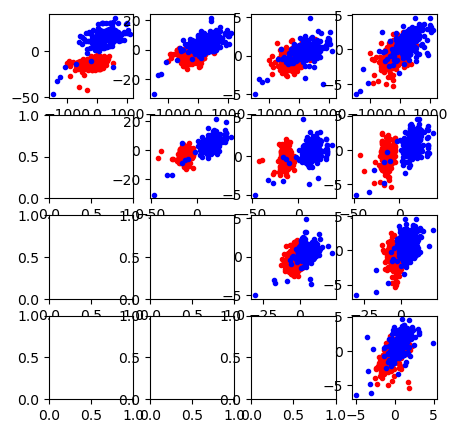

In [7]:
#Features
x = newdf[['Weight', 'Bill', 'TLen', 'TWid', 'TDep']]
x = x - np.mean(x,axis=0)
x_array = x.values
#Target values
y = newdf['sex']
y_array = y.values
#Replace m and f with numerical values for easier plotting
newdf['sex'] = newdf['sex'].replace({"m": 0, "f": 1})
colours = ['r', 'b']
fig, axs = pl.subplots(4, 4, figsize=(5, 5))
for c in range(2):
    inds = np.where(y==c)
    for d1 in range(4):
        for d2 in range(d1+1,5):
            axs[d1,d2-1].plot(x_array[inds,d1],x_array[inds,d2],'.',color=colours[c])

# Task 3
* Use my PCA code to perform PCA on the 5D representation you've just plotted (2 marks)
* Make the scree plot and decide how many components you should use (2 marks)
* Reproduce the same plots you just made with the PCA data (1 mark)
* Explain why the overlaps are so high for the last couple of components (1 mark)

In [8]:
# Here is PCA
def pca(data):
    # Assumes that data is ordered as rows for datapoints
    
    # Store the means and subtract them
    means = data.mean(axis=0)
    data = data-means
    
    # Compute the covariance matrix
    C = np.cov(data.T)

    # Get the eigenvalues and eigenvectors
    evals,evecs = np.linalg.eig(C)

    # Now need to sort them into descending order
    indices = np.argsort(evals)
    indices = indices[::-1]
    evecs = evecs[:,indices]
    evals = evals[indices]

    # Transform the data
    return np.dot(evecs.T,data.T).T, evals, evecs, means

[0.99896607 0.99991213 0.99998607 0.99999616 1.        ]


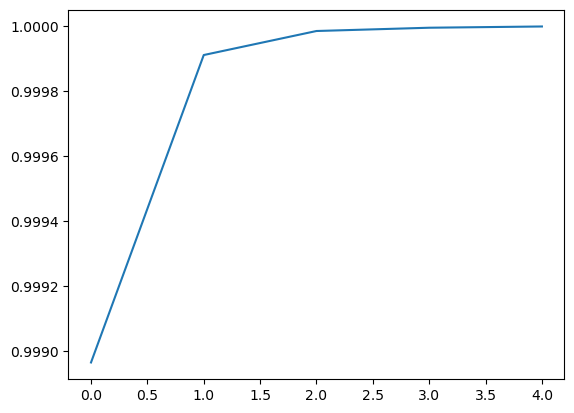

In [9]:
newx, evals, evecs, means = pca(x_array)
cs = np.cumsum(evals)
cs /= cs[-1]
print(cs)
pl.plot(cs);

One component may be used.

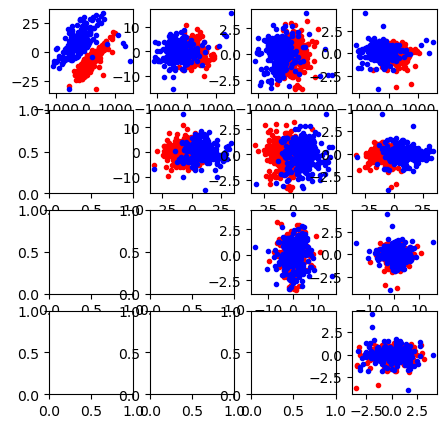

In [10]:
fig, axs = pl.subplots(4, 4, figsize=(5, 5))
for c in range(2):
    inds = np.where(y==c)
    for d1 in range(4):
        for d2 in range(d1+1,5):
            axs[d1,d2-1].plot(newx[inds,d1],newx[inds,d2],'.',color=colours[c])

The last few components are strongly correlated to each other. The width of the bird's tarsus is proportional to its depth.

# Task 4
Those measurements that look particularly wrong are actually chicks. We are going to look at two of them: `Charlie` and `Jackie (Marcus Aurelius)`
* Extract just those two birds and store them in a new dataset each (1 mark)
* Plot their weight and (separately) bill length against time (year) (1 mark)
* Charlie was a freshly hatched egg, but Jackie was caught as a juvenile. Estimate Jackie's age when we first caught her. Explain your answer. (1 mark)
* Assuming that Charlie's first weight is age 0, use that number to estimate the age at each measurement, and plot both bill length and weight against estimated age for both birds (2 marks) I used `from datetime import timedelta`
* Fit a regression line to the two measurements (bill length and weight) (use the code we used in the first lecture). That code allows you to fit higher-order functions (it's the 1 at the end). What order looks best for the two birds? (2 marks)

In [11]:
charlie_df = newdf[newdf['Name'] == 'Charlie']
jackie_df = newdf[newdf['Name'] == 'Jackie (Marcus Aurelius)']

Text(0, 0.5, 'Weight (g)')

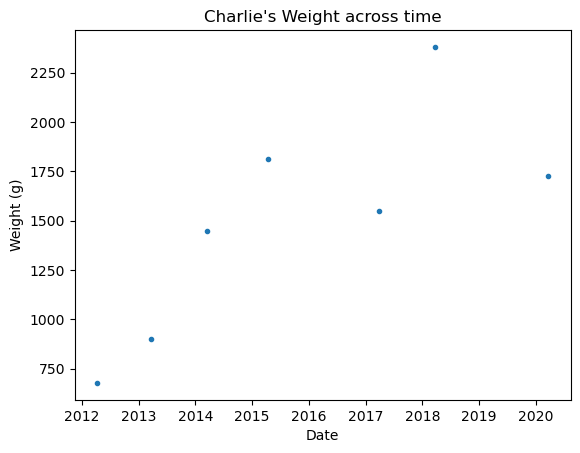

In [12]:
pl.plot(charlie_df['Date'].array, charlie_df['Weight'].array, '.')
pl.title("Charlie's Weight across time")
pl.xlabel("Date")
pl.ylabel("Weight (g)")

Text(0, 0.5, 'Weight (g)')

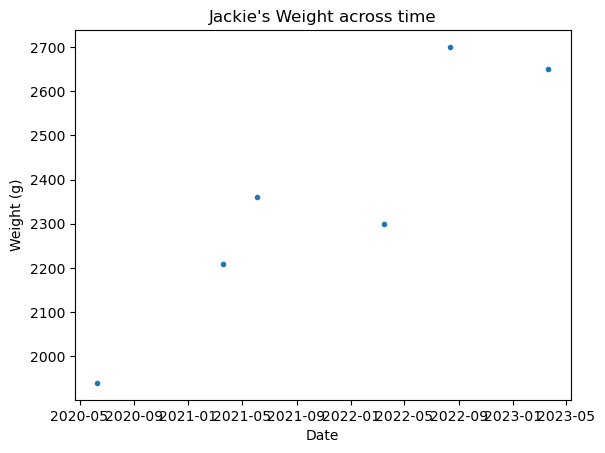

In [13]:
pl.plot(jackie_df['Date'].array, jackie_df['Weight'].array, '.')
pl.title("Jackie's Weight across time")
pl.xlabel("Date")
pl.ylabel("Weight (g)")

Text(0, 0.5, 'Bill length (cm)')

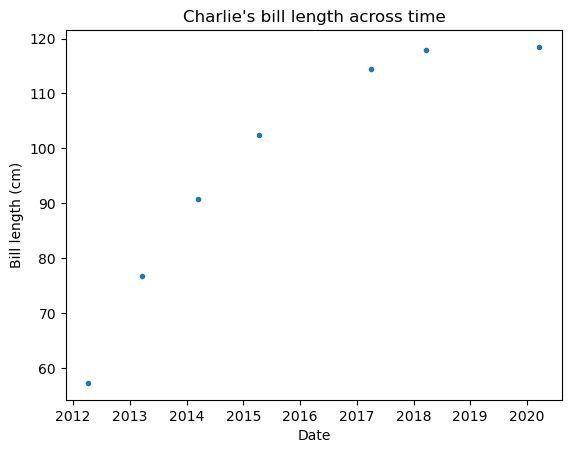

In [15]:
pl.plot(charlie_df['Date'].array, charlie_df['Bill'].array, '.')
pl.title("Charlie's bill length across time")
pl.xlabel("Date")
pl.ylabel("Bill length (cm)")

Text(0, 0.5, 'Bill length (cm)')

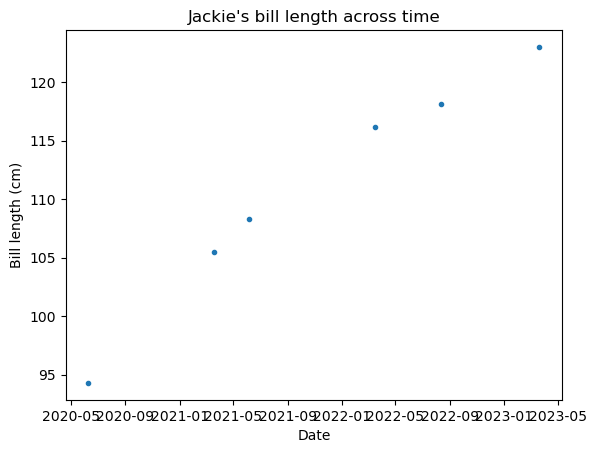

In [16]:
pl.plot(jackie_df['Date'].array, jackie_df['Bill'].array, '.')
pl.title("Jackie's bill length across time")
pl.xlabel("Date")
pl.ylabel("Bill length (cm)")

In [17]:
#Checking what weight Jackie was at first measurement, and what her bill length was
jackie_df.iloc[0]

Name      Jackie (Marcus Aurelius)
sex                              1
Date           2020-06-10 00:00:00
Weight                      1940.0
Bill                         94.29
TLen                         84.94
TWid                         11.88
TDep                         15.32
Name: 500, dtype: object

In [18]:
#Checking what age Charlie was when he was a similar weight and had a similar bill length
charlie_df

,Name,sex,Date,Weight,Bill,TLen,TWid,TDep
44,Charlie,1,2012-04-09,678.0,57.333333,60.566667,7.833333,10.366667
80,Charlie,1,2013-03-19,900.0,76.766667,74.233333,9.400000,13.966667
124,Charlie,1,2014-03-18,1450.0,90.833333,84.166667,12.400000,16.600000
193,Charlie,1,2015-04-11,1810.0,102.466667,89.666667,12.733333,18.133333
287,Charlie,1,2017-03-30,1550.0,114.400000,92.166667,13.733333,19.366667
334,Charlie,1,2018-03-25,2380.0,117.933333,96.933333,13.200000,19.033333
420,Charlie,1,2020-03-21,1725.0,118.473333,95.233333,12.046667,15.570000


Jackie's bill length of 94.29mm matches closest with Charlie's bill length of 92.167mm, which was when he was about 5 years old. Jackie's weight of 1940g matches up most with Charlie's weight of 1810g, which was when he was about three years old. With the assumption that female birds are roughly the same proportion as males as they grow, I estimate Jackie's age to be about four years old when her first measurement was taken.

In [19]:
from datetime import timedelta
charlie_df.loc[:, 'Age'] = (charlie_df.loc[: ,'Date'] - charlie_df.loc[: ,'Date'].iloc[0]).dt.days
charlie_df.loc[:, 'Age'] = charlie_df.loc[:, 'Age'] / 365
jackie_df.loc[: ,'Age'] = (jackie_df.loc[: ,'Date'] - (jackie_df.loc[: ,'Date'].iloc[0])).dt.days
jackie_df.loc[: ,'Age'] = jackie_df.loc[: ,'Age'] + 1460 #four years
jackie_df.loc[:, 'Age'] = jackie_df.loc[:, 'Age'] / 365

/tmp/ipykernel_27730/2198963877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charlie_df.loc[:, 'Age'] = (charlie_df.loc[: ,'Date'] - charlie_df.loc[: ,'Date'].iloc[0]).dt.days
/tmp/ipykernel_27730/2198963877.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jackie_df.loc[: ,'Age'] = (jackie_df.loc[: ,'Date'] - (jackie_df.loc[: ,'Date'].iloc[0])).dt.days


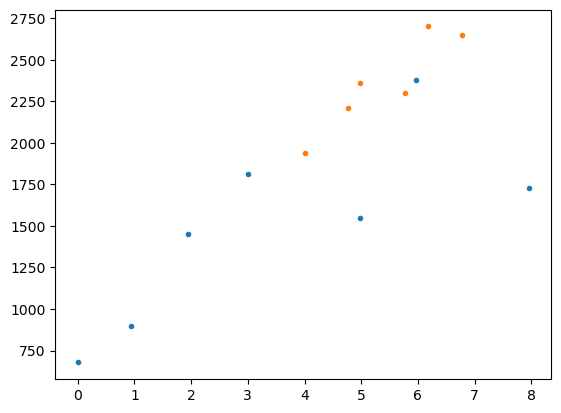

In [20]:
pl.plot(charlie_df['Age'].values, charlie_df['Weight'].values, '.')
pl.plot(jackie_df['Age'].values, jackie_df['Weight'].values, '.')

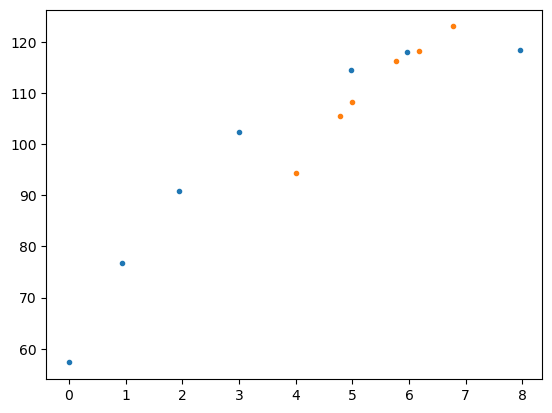

In [21]:
pl.plot(charlie_df['Age'].values, charlie_df['Bill'].values, '.')
pl.plot(jackie_df['Age'].values, jackie_df['Bill'].values, '.')

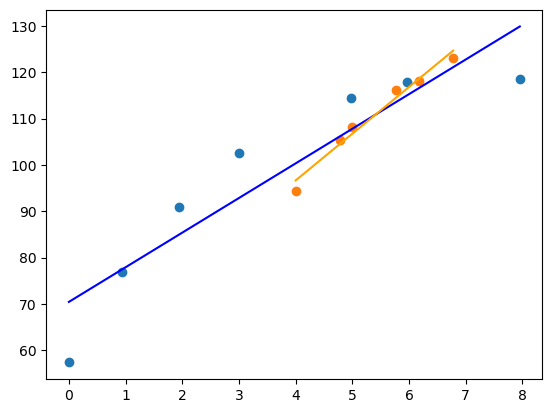

In [22]:
fit1 = np.polyfit(charlie_df['Age'].values, charlie_df['Bill'].values, 1)
slope1, intercept1 = fit1
x_range1 = np.linspace(charlie_df['Age'].values.min(), charlie_df['Age'].values.max(), 100)
y_predicted1 = slope1 * x_range1 + intercept1

fit2 = np.polyfit(jackie_df['Age'].values, jackie_df['Bill'].values, 1)
slope2, intercept2 = fit2
x_range2 = np.linspace(jackie_df['Age'].values.min(), jackie_df['Age'].values.max(), 100)
y_predicted2 = slope2 * x_range2 + intercept2

pl.scatter(charlie_df['Age'].values, charlie_df['Bill'].values, label='Charlie')
pl.scatter(jackie_df['Age'].values, jackie_df['Bill'].values, label='Jackie')
pl.plot(x_range1, y_predicted1, color='blue', label="Linear Regression Line")
pl.plot(x_range2, y_predicted2, color='orange', label="Linear Regression Line")

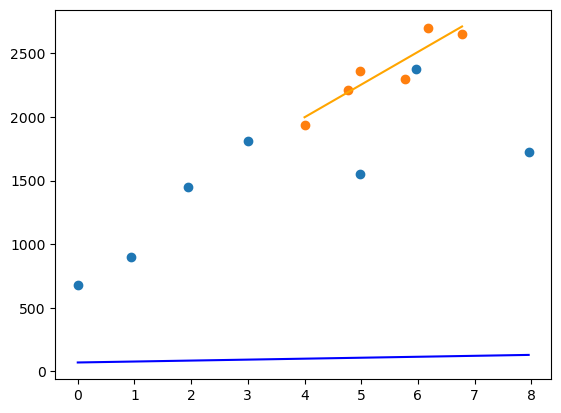

In [23]:
fit3 = np.polyfit(charlie_df['Age'].values, charlie_df['Weight'].values, 1)
slope3, intercept3 = fit3
x_range3 = np.linspace(charlie_df['Age'].values.min(), charlie_df['Age'].values.max(), 100)
y_predicted3 = slope3 * x_range3 + intercept3

fit4 = np.polyfit(jackie_df['Age'].values, jackie_df['Weight'].values, 1)
slope4, intercept4 = fit4
x_range4 = np.linspace(jackie_df['Age'].values.min(), jackie_df['Age'].values.max(), 100)
y_predicted4 = slope4 * x_range4 + intercept4

pl.scatter(charlie_df['Age'].values, charlie_df['Weight'].values, label='Charlie')
pl.scatter(jackie_df['Age'].values, jackie_df['Weight'].values, label='Jackie')
pl.plot(x_range3, y_predicted1, color='blue', label="Linear Regression Line")
pl.plot(x_range4, y_predicted4, color='orange', label="Linear Regression Line")